In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### [다음 사이트](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)에서 Mall_Customer.csv 데이터를 다운 받아주세요!

#### 1.1 데이터를 로드하고 확인해주세요.

In [8]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 1.2 'CustomerID'는 군집 분석에 필요없는 변수이므로 삭제하겠습니다. 삭제한 후 데이터셋의 행, 열 수를 확인해주세요.

In [9]:
df = df.drop('CustomerID', axis=1)
df.shape

(200, 4)

#### 1.3 데이터셋 변수들의 정보를 확인해주세요.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#### 1.4 'Gender' 변수의 자료형이 object이므로 전처리가 필요할 것 같습니다. get_dummies를 이용해 원핫인코딩 진행 후 데이터셋을 확인해주세요.

In [11]:
df = pd.get_dummies(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


#### 1.5 데이터를 5개의 그룹으로 군집화해보겠습니다. n_cluster = 5, 초기 중심 설정 방식 : k-means++, 최대 반복 횟수 : 300으로 설정하여 KMeans 객체를 만든 후 fit( )을 수행해주세요.

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)


KMeans(n_clusters=5, random_state=0)

#### 1.6 kmeans의 labels_ 속성값을 확인해보겠습니다.

In [14]:
print(kmeans.labels_)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


#### 1.7 target 값은 데이터의 spending score로, cluster 칼럼은 앞에서 구한 labels_ 값으로 지정하여 target과 cluster 값 개수를 비교하세요.

In [15]:
df['target'] = df['Spending Score (1-100)']
df['cluster'] = kmeans.labels_
df_result = df.groupby('target')['cluster'].value_counts()
print(df_result)

target  cluster
1       3          2
3       0          1
4       0          2
5       3          3
        0          1
                  ..
94      4          1
95      1          2
97      1          2
98      4          1
99      4          1
Name: cluster, Length: 106, dtype: int64


#### 1.8 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤 X좌표, Y좌표로 개별 데이터를 표현하도록 하겠습니다.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df.iloc[:, 0:5])

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y
0,19,15,39,0,1,39,0,-31.869381,-33.001079
1,21,15,81,0,1,81,4,0.765592,-56.841935
2,20,16,6,1,0,6,0,-57.407825,-13.126987
3,23,16,77,1,0,77,4,-2.167187,-53.479276
4,31,17,40,1,0,40,0,-32.173249,-30.389820


#### 1.9 군집별 산점도를 출력합니다.

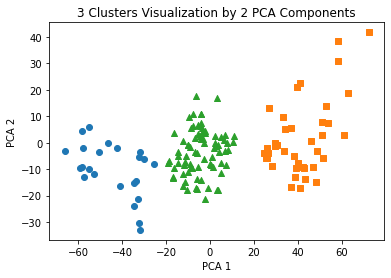

In [19]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = df[df['cluster']==0].index
marker1_ind = df[df['cluster']==1].index
marker2_ind = df[df['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=df.loc[marker0_ind, 'pca_x'], y = df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=df.loc[marker1_ind, 'pca_x'], y = df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=df.loc[marker2_ind, 'pca_x'], y = df.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#### 1.10 데이터를 이용한 군집 평가

In [20]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#### 1.11 1.5와 1.7의 코드를 바탕으로 데이터셋의 모든 개별 데이터에 실루엣 계수 값을 구해주세요.

In [21]:
score_samples = silhouette_samples(df.iloc[:,0:5], df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (200,)


#### 1.12 데이터셋 데이터프레임에 실루엣 계수 칼럼을 추가해주세요.

In [22]:

df['silhouette_coeff'] = score_samples

#### 1.13 모든 데이터의 평균 실루엣 계수값을 구하고 확인해주세요.

In [24]:
average_score = silhouette_score(df.iloc[:,0:5], df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

df.head(3)

붓꽃 데이터셋 Silhouette Analysis Score:0.444


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y,silhouette_coeff
0,19,15,39,0,1,39,0,-31.869381,-33.001079,0.113110
1,21,15,81,0,1,81,4,0.765592,-56.841935,0.695946
2,20,16,6,1,0,6,0,-57.407825,-13.126987,0.442292


#### 1.14 데이터셋의 군집 칼럼별로 groupby하여 실루엣 계수 칼럼의 평균값을 구해주세요.

In [26]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.416018
1    0.532762
2    0.371383
3    0.426101
4    0.597604
Name: silhouette_coeff, dtype: float64

#### 1.15 Inertia와 Elbow를 구하는 코드입니다. 참고해주세요.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


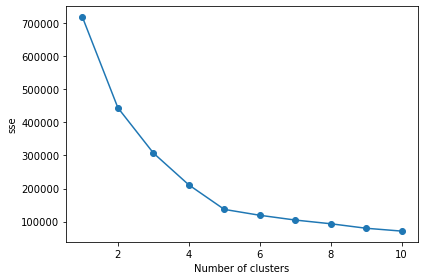

In [27]:
# 중심점 - 데이터 거리를 합산한 inertia(sse)를 빈 array로 생성
sse = []

# 반복문을 실행하며 군집의 개수가 1~11까지 kmeans를 실행 --> sse array에 추가
for i in range(1, 11) :
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(df)
    sse.append(km.inertia_)

# sse array 시각화   
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.tight_layout()
plt.show()

#### 2.1 데이터는 1의 데이터를 계속 활용합니다. 'Annual income'에 대한 'Spending Score'을 scatter plot으로 나타내주세요.

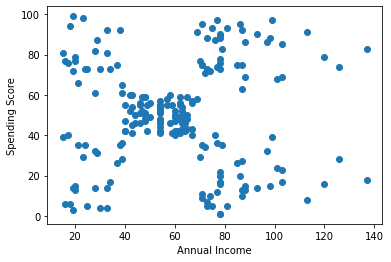

In [30]:
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### 2.2 StandardScaler를 통해 정규화를 진행해주세요.

In [31]:
from sklearn.preprocessing import StandardScaler

df_features = df.iloc[:,0:5]

standardscaler = StandardScaler()
scaled = standardscaler.fit_transform(df_features)

In [34]:
df_std = pd.DataFrame(scaled, columns = df_features.columns)
df_std.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


#### 2.3 최적 대역폭을 구하여 평균 이동 군집화를 진행해주세요. 최적 bandwidth와 cluster label 유형을 출력해주세요. (인자 : df_std)

In [36]:
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift

h = estimate_bandwidth(df_std)
print('최적 bandwidth 값:', round(h,3))

ms = MeanShift(bandwidth=h)
cluster_labels = ms.fit_predict(df_std)
print('cluster labels 유형:', np.unique(cluster_labels))


최적 bandwidth 값: 2.461
cluster labels 유형: [0 1]


#### 2.4 target 변수를 'Spending Score'로 설정하여 결과를 확인하려고 합니다. 다음 코드의 빈칸을 채워주세요.

In [37]:
df['target'] = df['Spending Score (1-100)']
df['cluster']= cluster_labels
result = df.groupby(['target','cluster'])['Annual Income (k$)'].count()
print(result)

target  cluster
1       1          2
3       1          1
4       1          2
5       0          2
        1          2
                  ..
95      0          1
        1          1
97      1          2
98      0          1
99      0          1
Name: Annual Income (k$), Length: 120, dtype: int64


#### 2.5 2차원으로 축소하여 시각화를 진행하려고 합니다. 다음 코드의 빈칸을 채워주세요.

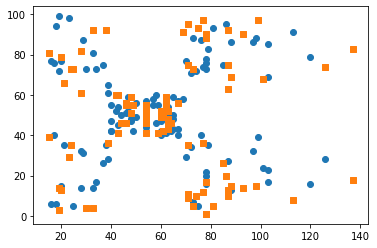

In [38]:
m0_ind = df[df['cluster']==0].index
m1_ind = df[df['cluster']==1].index

plt.scatter(x=df.loc[m0_ind,'Annual Income (k$)'], y=df.loc[m0_ind,'Spending Score (1-100)'],marker='o')
plt.scatter(x=df.loc[m1_ind,'Annual Income (k$)'], y=df.loc[m1_ind,'Spending Score (1-100)'],marker='s')

plt.show()

#### 2.6 사이킷런 AgglomerativeClustering 클래스를 통해 병합군집을 진행해주세요. 클러스터 개수는 3으로, 병합 방식은 'ward'로 설정해주세요. cluster labels 유형을 출력해주세요.  (인자 : df)

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")

cluster_labels = agg.fit_predict(df.iloc[:,0:5])
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


#### 2.7 덴드로그램을 그려주세요.

In [45]:
from scipy.cluster.hierarchy import dendrogram, ward

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342

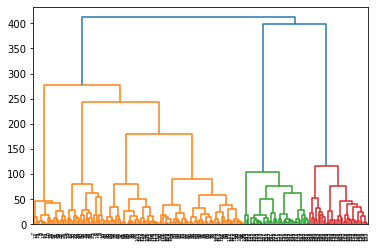

In [47]:
linkage_array = ward(df.iloc[:,0:5])
dendrogram(linkage_array)

#### 2.8 다시 데이터를 로드하고 다음 코드를 실행해주세요.

In [48]:
#데이터 다시 로드
df = pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID', axis = 1, inplace = True)
df = pd.get_dummies(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


#### 2.9 AIC, BIC를 구하여 n_components 값을 결정하려고 합니다. 다음 코드의 빈칸을 채워주세요.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

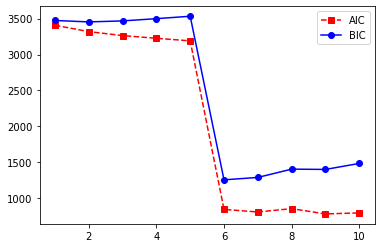

In [49]:
# AIC, BIC
from sklearn.mixture import GaussianMixture

gmm_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=0).fit(df) for k in range(1,11)]

bics = [model.bic(df) for model in gmm_per_k]  # model 별 bic 구하기
aics = [model.aic(df) for model in gmm_per_k]  # model 별 aic 구하기

plt.plot(range(1,11), aics, 'rs--')
plt.plot(range(1,11), bics, 'bo-')
plt.legend(['AIC','BIC'])
plt.show()

#### 2.10 GMM 군집화를 진행해주세요. 위의 결과를 참고하여 n_components를 결정해주세요. 이후 군집화 결과를 확인하기 위한 코드에서 빈칸을 채워주세요. (인자 : df) 

In [50]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6).fit(df)
gmm_cluster_labels = gmm.predict(df)

In [51]:
df['gmm_cluster'] = gmm_cluster_labels
df['target'] = df['Spending Score (1-100)']

result = df.groupby(['target'])['gmm_cluster'].value_counts()
print(result)

target  gmm_cluster
1       2              2
3       0              1
4       0              2
5       2              3
        0              1
                      ..
94      3              1
95      4              2
97      4              2
98      3              1
99      3              1
Name: gmm_cluster, Length: 111, dtype: int64


In [52]:
np.unique(gmm_cluster_labels)

array([0, 1, 2, 3, 4, 5], dtype=int64)

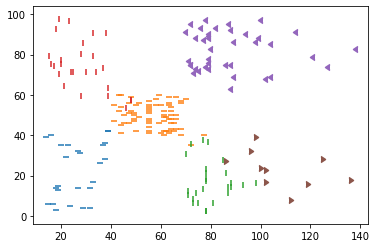

In [53]:
for i in range(0,6):
  m_ind = df[df['gmm_cluster']==i].index
  plt.scatter(x=df.loc[m_ind,'Annual Income (k$)'], y=df.loc[m_ind,'Spending Score (1-100)'],marker=i)

plt.show()

3.1

(1) 앞에서 사용한 Mall_Customers 데이터를 다시 사용하겠습니다. 아래 코드를 불러주세요.

In [54]:
df = pd.read_csv("Mall_Customers.csv")
df = df.drop('CustomerID', axis=1)
df = pd.get_dummies(df)

In [55]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


(2) 보다 용이한 시각화를 위해 "Annual Income (k$)", "Spending Score (1-100)" 열들만 사용하여 2개의 feature에 대한 고객 군집화를 진행하겠습니다. 그러기 위해 빈칸(<?>)을 채워주세요.

In [57]:
data = df.loc[:, ['Annual Income (k$)','Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


(3) DBSCAN 군집화를 실행하기 전, 위에서 만든 data에 대한 정규화를 위해 빈칸(<?>)을 채워주세요.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
data_scale = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scale.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


(4) DBSCAN 클래스를 이용해 위에서 생성한 데이터를 군집화하기 위해 빈칸(<?>)을 채워주세요.(eps = 0.4, min_samples=5, metric="euclidean")

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
dbscan = DBSCAN(eps = 0.4, min_samples=5, metric="euclidean")
dbscan_labels = dbscan.fit_predict(data_scale)
data_scale["cluster"] = dbscan_labels

(5) 위에서 진행한 군집화의 결과를 시각화하겠습니다. 빈칸(<?>)을 채워주세요.

In [62]:
np.unique(dbscan_labels)

array([-1,  0,  1,  2,  3], dtype=int64)

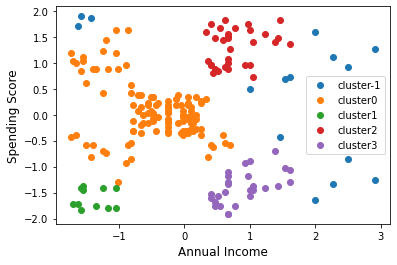

In [64]:
for i in range(-1,4):
    plt.scatter(data_scale.loc[data_scale["cluster"]==i, "Annual Income (k$)"],
               data_scale.loc[data_scale["cluster"]==i,"Spending Score (1-100)"],
                label = "cluster" + str(i))
    
plt.legend()
plt.xlabel("Annual Income", size=12)
plt.ylabel("Spending Score",size=12)
plt.show()

(6) cluster의 값이 -1인 경우가 존재하는 것을 확인할 수 있습니다. 해당 값은 무엇을 의미하는지 작성해주세요.

[답안]

: 잡음 포인트. 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터.

3.2

(1) 위에서 만든 df 데이터셋을 이용하겠습니다. BayesianGaussianMixture를 사용하여 베이지안 가우시안 모델을 이용한 군집화를 진행하기 위해 빈칸(<?>)을 채워주세요.(n_components=10, n_init=10)

In [65]:
from sklearn.mixture import BayesianGaussianMixture

In [67]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(df)

BayesianGaussianMixture(n_components=10, n_init=10)

(2) 몇 개의 컴포넌트가 필요한지 알아내는 코드를 작성해주세요.

In [70]:
n_clusters = (np.round(bgm.weights_,2)>0).sum()
n_clusters

8